In [37]:
import pandas as pd

In [38]:
path = "/Users/lisawinkler/Documents/PhD/Data/Germany_Census_2011/"

In [39]:
translation = pd.read_excel(path + 'Data_Format_Census.xlsx', sheet_name='Translations')

In [40]:
translation

,Original,Translated
0,INSGESAMT,TOTAL
1,Einheiten insgesamt,Total
2,FAMTYP_KIND,FAMTYP_CHILD
3,FAMGROESS_KLASS,FAMSIZE
4,HHTYP_SENIOR_HH,HHTYP_SENIOR
...,...,...
204,1 Wohnung,1 apartment
205,2 Wohnungen,2 apartments
206,3 - 6 Wohnungen,3 - 6 apartments
207,7 - 12 Wohnungen,7 - 12 apartments


In [41]:
translation_dict = translation.set_index('Original')['Translated'].to_dict()

In [42]:
translation_dict

{'INSGESAMT': 'TOTAL',
 'Einheiten insgesamt': 'Total',
 'FAMTYP_KIND': 'FAMTYP_CHILD',
 'FAMGROESS_KLASS': 'FAMSIZE',
 'HHTYP_SENIOR_HH': 'HHTYP_SENIOR',
 'Ehepaare ohne Kind': 'Married couples without children',
 'Ehepaare, mind. 1 Kind < 18': 'Married couples, at least 1 child < 18',
 'Ehepaare alle Kinder ≥ 18': 'Married couples all children ≥ 18',
 'Eingetr. Lebenspartnerschaften ohne Kind': 'Registered Civil partnerships without children',
 'Eingetr. Lebenspartnerschaften mind. 1 Kind < 18': 'Registered Civil partnerships with at least 1 child < 18',
 'Eingetr. Lebenspartnerschaften alle Kinder ≥ 18': 'Registered Civil partnerships all children ≥ 18',
 'Nichteheliche Lebensgem. ohne Kind': 'Non-marital cohabitation without child',
 'Nichteheliche Lebensgem. mind. 1 Kind < 18': 'Non-marital cohabitation at least 1 child < 18',
 'Nichteheliche Lebensgem. alle Kinder ≥ 18': 'Non-marital cohabitation all children ≥ 18',
 'Alleinerziehende Väter mind. 1 Kind < 18': 'Single fathers wit

In [43]:
households = pd.read_csv(path + 'csv_Haushalte_100m_Gitter/Haushalte100m.csv', delimiter=',', encoding="cp1252")

In [44]:
households

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26891E43370,CRS3035RES100mN2689100E4337000,INSGESAMT,0,Einheiten insgesamt,3,0
1,100mN26912E43412,CRS3035RES100mN2691200E4341200,INSGESAMT,0,Einheiten insgesamt,3,0
2,100mN26912E43412,CRS3035RES100mN2691200E4341200,HHTYP_LEB,2,Ehepaare,3,0
3,100mN26917E43411,CRS3035RES100mN2691700E4341100,INSGESAMT,0,Einheiten insgesamt,5,0
4,100mN26917E43411,CRS3035RES100mN2691700E4341100,HHGROESS_KLASS,1,1 Person,3,0
...,...,...,...,...,...,...,...
18806021,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHGROESS_KLASS,2,2 Personen,3,0
18806022,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHTYP_FAM,1,Einpersonenhaushalte (Singlehaushalte),3,0
18806023,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHTYP_FAM,2,Paare ohne Kind(er),3,0
18806024,100mN35476E42201,CRS3035RES100mN3547600E4220100,HHTYP_LEB,1,Einpersonenhaushalte (Singlehaushalte),3,0


In [45]:
pivot_df = households.pivot(index='Gitter_ID_100m', columns=['Merkmal', 'Auspraegung_Text'], values='Anzahl')

In [46]:
pivot_df

Merkmal                    INSGESAMT HHTYP_LEB HHGROESS_KLASS             \
Auspraegung_Text Einheiten insgesamt  Ehepaare       1 Person 2 Personen   
Gitter_ID_100m                                                             
100mN26891E43370                 3.0       NaN            NaN        NaN   
100mN26912E43412                 3.0       3.0            NaN        NaN   
100mN26917E43411                 5.0       3.0            3.0        3.0   
100mN26923E43411                 4.0       NaN            4.0        NaN   
100mN26924E43412                 3.0       NaN            NaN        3.0   
...                              ...       ...            ...        ...   
100mN35475E42201                17.0       5.0            9.0        7.0   
100mN35476E42198                20.0       7.0           13.0        7.0   
100mN35476E42199                16.0       3.0           10.0        3.0   
100mN35476E42200                 3.0       NaN            NaN        NaN   
100mN35476E42201                 6.0       4.0            3.0        3.0   

Merkmal                                       HHTYP_FAM                      \
Auspraegung_Text Einpersonenhaushalte (Singlehaushalte) Paare ohne Kind(er)   
Gitter_ID_100m                                                                
100mN26891E43370                                    NaN                 NaN   
100mN26912E43412                                    NaN                 NaN   
100mN26917E43411                                    3.0                 3.0   
100mN26923E43411                                    4.0                 NaN   
100mN26924E43412                                    NaN                 NaN   
...                                                 ...                 ...   
100mN35475E42201                                    9.0                 5.0   
100mN35476E42198                                   13.0                 7.0   
100mN35476E42199                                   10.0                 3.0   
100mN35476E42200                                    NaN                 NaN   
100mN35476E42201                                    3.0                 3.0   

Merkmal                                       HHTYP_LEB  \
Auspraegung_Text Einpersonenhaushalte (Singlehaushalte)   
Gitter_ID_100m                                            
100mN26891E43370                                    NaN   
100mN26912E43412                                    NaN   
100mN26917E43411                                    3.0   
100mN26923E43411                                    4.0   
100mN26924E43412                                    NaN   
...                                                 ...   
100mN35475E42201                                    9.0   
100mN35476E42198                                   13.0   
100mN35476E42199                                   10.0   
100mN35476E42200                                    NaN   
100mN35476E42201                                    3.0   

Merkmal                             HHTYP_FAM               HHTYP_LEB  \
Auspraegung_Text Alleinerziehende Elternteile Alleinerziehende Mütter   
Gitter_ID_100m                                                          
100mN26891E43370                          NaN                     NaN   
100mN26912E43412                          NaN                     NaN   
100mN26917E43411                          NaN                     NaN   
100mN26923E43411                          NaN                     NaN   
100mN26924E43412                          3.0                     3.0   
...                                       ...                     ...   
100mN35475E42201                          3.0                     3.0   
100mN35476E42198                          NaN                     NaN   
100mN35476E42199                          NaN                     NaN   
100mN35476E42200                          NaN                     NaN   
100mN35476E42201                          NaN       

0 and missing information is different. exclude NaNs from calculations. treat them in the formula e.g. 0 replacement (only if nans mean 0), or exclude them (mask isna)

read documentation on what nan means

In [47]:
pivot_df = pivot_df.rename(columns=translation_dict)

In [48]:
pivot_df

Merkmal          TOTAL        HHTYP_LS   HHSIZE           \
Auspraegung_Text Total Married couples 1 person 2 people   
Gitter_ID_100m                                             
100mN26891E43370   3.0             NaN      NaN      NaN   
100mN26912E43412   3.0             3.0      NaN      NaN   
100mN26917E43411   5.0             3.0      3.0      3.0   
100mN26923E43411   4.0             NaN      4.0      NaN   
100mN26924E43412   3.0             NaN      NaN      3.0   
...                ...             ...      ...      ...   
100mN35475E42201  17.0             5.0      9.0      7.0   
100mN35476E42198  20.0             7.0     13.0      7.0   
100mN35476E42199  16.0             3.0     10.0      3.0   
100mN35476E42200   3.0             NaN      NaN      NaN   
100mN35476E42201   6.0             4.0      3.0      3.0   

Merkmal                         HHTYP_FAM                           \
Auspraegung_Text Single-person households Couples without children   
Gitter_ID_100m                                                       
100mN26891E43370                      NaN                      NaN   
100mN26912E43412                      NaN                      NaN   
100mN26917E43411                      3.0                      3.0   
100mN26923E43411                      4.0                      NaN   
100mN26924E43412                      NaN                      NaN   
...                                   ...                      ...   
100mN35475E42201                      9.0                      5.0   
100mN35476E42198                     13.0                      7.0   
100mN35476E42199                     10.0                      3.0   
100mN35476E42200                      NaN                      NaN   
100mN35476E42201                      3.0                      3.0   

Merkmal                          HHTYP_LS      HHTYP_FAM       HHTYP_LS  \
Auspraegung_Text Single-person households Single parents Single mothers   
Gitter_ID_100m                                                            
100mN26891E43370                      NaN            NaN            NaN   
100mN26912E43412                      NaN            NaN            NaN   
100mN26917E43411                      3.0            NaN            NaN   
100mN26923E43411                      4.0            NaN            NaN   
100mN26924E43412                      NaN            3.0            3.0   
...                                   ...            ...            ...   
100mN35475E42201                      9.0            3.0            3.0   
100mN35476E42198                     13.0            NaN            NaN   
100mN35476E42199                     10.0            NaN            NaN   
100mN35476E42200                      NaN            NaN            NaN   
100mN35476E42201                      3.0            NaN            NaN   

Merkmal                      HHTYP_FAM   HHSIZE                    \
Auspraegung_Text Couples with children 4 people 5 people 3 people   
Gitter_ID_100m                                                      
100mN26891E43370                   NaN      NaN      NaN      NaN   
100mN26912E43412                   NaN      NaN      NaN      NaN   
100mN26917E43411                   NaN      NaN      NaN      NaN   
100mN26923E43411                   NaN      NaN      NaN      NaN   
100mN26924E43412                   NaN      NaN      NaN      NaN   
...                                ...      ...      ...      ...   
100mN35475E42201                   NaN      NaN      NaN      NaN   
100mN35476E42198                   NaN      NaN      NaN      NaN   
100mN35476E42199                   NaN      NaN      3.0      NaN   
100mN35476E42200                   NaN      NaN      NaN      NaN   
100mN35476E42201                   NaN      NaN      NaN      NaN   

Merkmal                                               HHTYP_FAM  \
Auspraegung_Text Multi-person households without nuclear family   
Gitter_ID_100m            

In [49]:
pivot_df['TOTAL']['Total'].sum()

37343591.0

In [50]:
pivot_df['HHSIZE_DC'] = pivot_df['HHSIZE'].sum(axis=1) / pivot_df['TOTAL']['Total']

<Axes: >

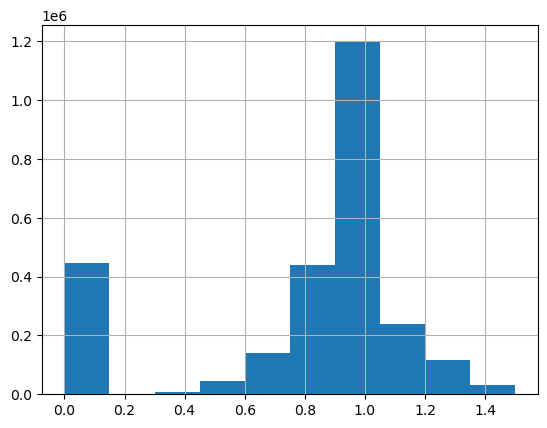

In [51]:
pivot_df['HHSIZE_DC'].hist(bins=10)

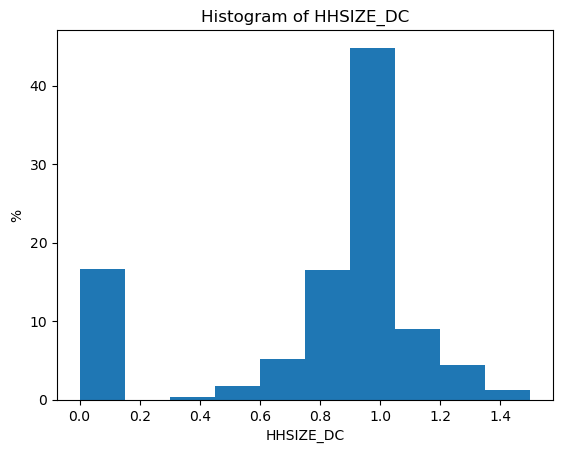

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pivot_df['HHSIZE_DC'] is a pandas Series
data = pivot_df['HHSIZE_DC']

# Calculate the histogram (bin counts) and bin edges
counts, bins = np.histogram(data)

# Normalize the counts to get percentage
counts = counts / counts.sum() * 100

# Create the histogram using plt.hist, using the bins from np.histogram
plt.hist(bins[:-1], bins, weights=counts)

plt.xlabel('HHSIZE_DC')
plt.ylabel('%')
plt.title('Histogram of HHSIZE_DC')

plt.show()

In [53]:
pivot_df.to_csv(path + 'Households100m_pivot.csv', sep=',', encoding="cp1252")

In [54]:
pivot_df['HHTYP_LS'].sum().sum()

35302273.0

In [55]:
pivot_df['HHSIZE'].sum().sum()

35040804.0

In [56]:
pivot_df['HHTYP_FAM'].sum().sum()

35743161.0